# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

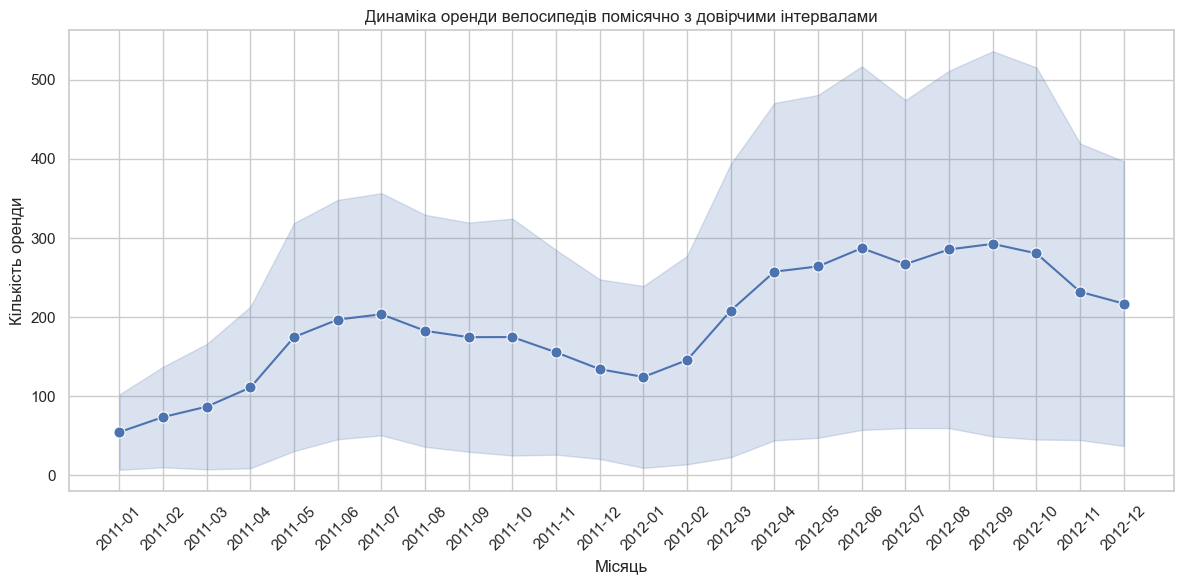

In [92]:
plt.figure(figsize=(12,6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker='o', markersize=8)
plt.title('Динаміка оренди велосипедів помісячно з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренди')
plt.xticks(rotation=45)
plt.tight_layout();

In [ ]:
В які місяці найбільша невизначеність в даних?

Найбільша невизначеність в даних спостерігається у 8, 9, 10 місяцях 2012 року.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

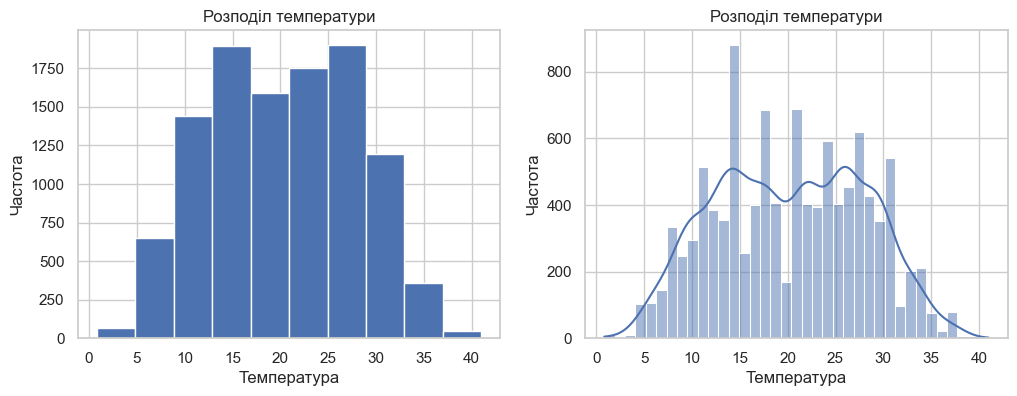

In [91]:
plt.figure(figsize=(12,4)) 
# Pandas гістограма
plt.subplot(1, 2, 1)  
df['temp'].plot.hist(
    title='Розподіл температури',
    xlabel='Температура',
    ylabel='Частота',
)

# Seaborn гістограма
plt.subplot(1, 2, 2)  
sns.histplot(df['temp'], kde=True)
plt.title('Розподіл температури')
plt.xlabel('Температура')
plt.ylabel('Частота')
plt.show()


In [ ]:
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?

При побудові гістограм без яких-небудь додаткових налаштувань можемо бачити що автоматична кількість проміжків різна. В Pandas гістограмі маємо 
розбивку на 10 проміжків, а в Seaborn гістограмі більше 30. Також відрізняються налаштування кольору.

2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

При автоматичних налаштуваннях ця лінія відсутня, я її додала за допомогою парметру kde і вона показує
оцінку щільності розподілу, тобто дає уявлення про форму розподілу.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

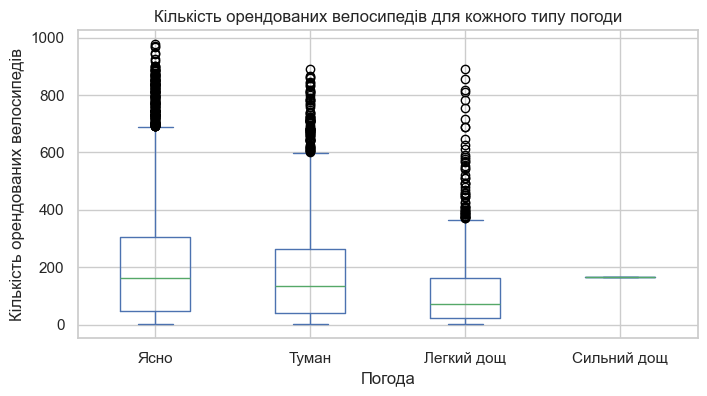

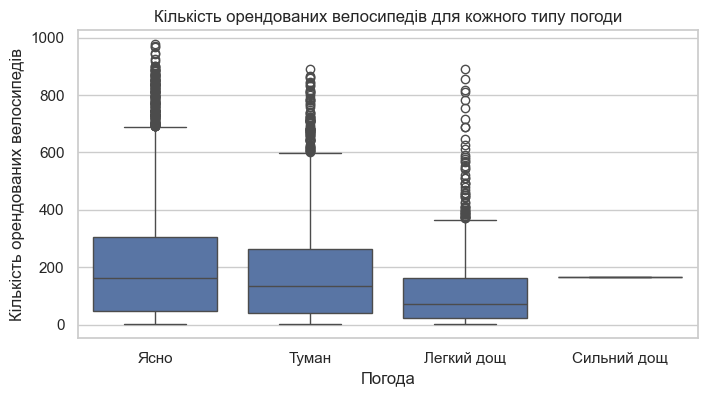

In [71]:
# Pandas boxplot
df[['count', 'weather']].plot.box(
    by='weather',
    figsize=(8,4),
    ylabel='Кількість орендованих велосипедів',
    xlabel='Погода'
)
plt.xticks(
    ticks=[1, 2, 3, 4], 
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)
plt.title('Кількість орендованих велосипедів для кожного типу погоди')
plt.suptitle('') 
plt.show()


# Seaborn boxplot
plt.figure(figsize=(8,4)) 
sns.boxplot(x=df['weather'], y=df['count'])
plt.xticks(
    ticks=[0,1, 2, 3], 
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)
plt.title('Кількість орендованих велосипедів для кожного типу погоди')
plt.ylabel('Кількість орендованих велосипедів')
plt.xlabel('Погода')
plt.show()

In [ ]:
Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

Відрізняється колір побудови, в seaborn в боксах є заливка. В цілому боксплот в seaborn просто виглядає гарніше.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


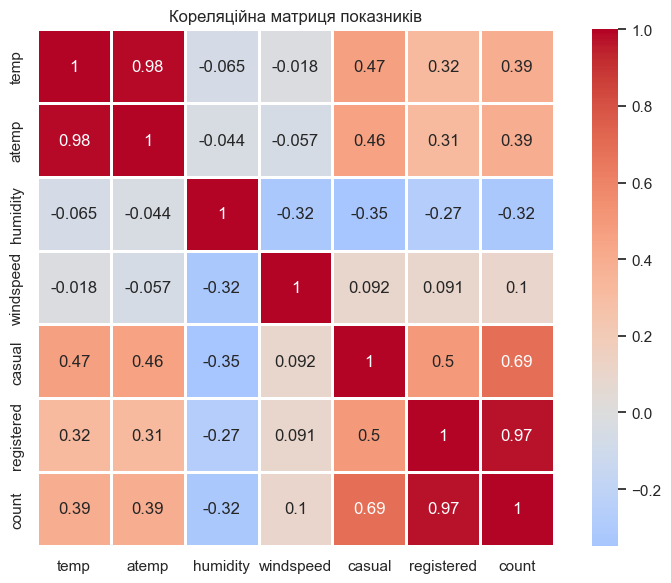

In [73]:
correlation=df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

In [ ]:
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?

З загальною кількістю оренди (count) найбільше корелюють змінні які показують кількість оренди для 
зареєстрованих клєнтів і для випадкових.

2. Яка кореляція між temp та atemp? Чому?

Між temp та atemp кореляція дорівнює 0.98. Тому що є пряма залежність значення температури і значення 
як ця температура відчувається.

3. Які змінні мають негативну кореляцію?

Негативну кореляцію має змінна humidity зі змінними count, registered, casual, windspеed. В основному ці 
змінні показують кількість оренди, і ця негативна кореляція означає, що є обернений зв'язок, тобто
при збільшенні показника вологості кількість оренд падає.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


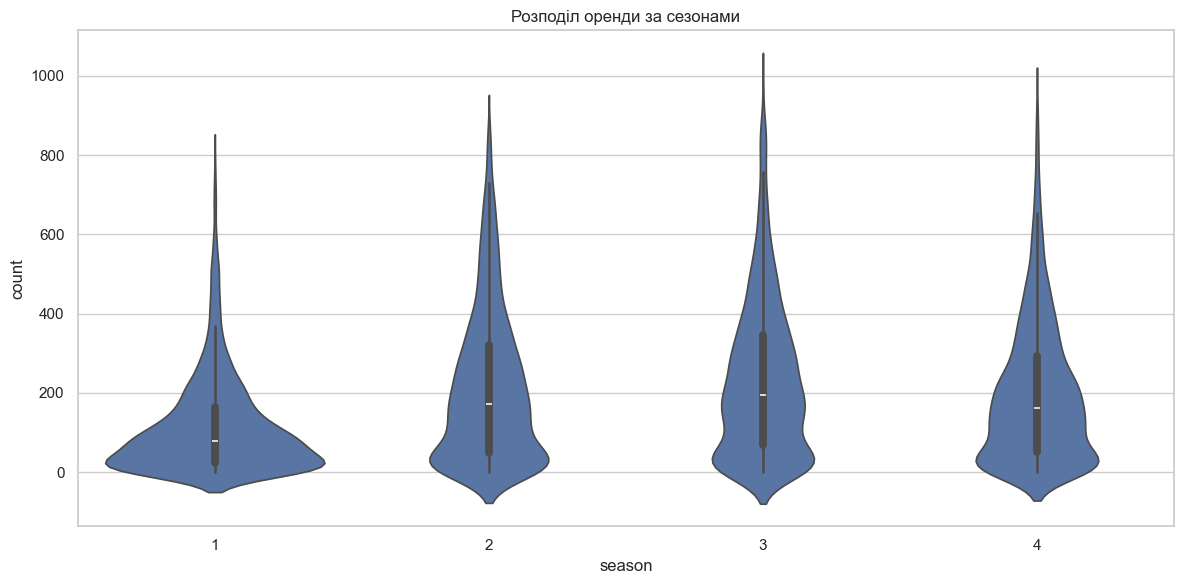

In [90]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='season', y='count')
plt.title('Розподіл оренди за сезонами')
plt.tight_layout()
plt.show()

In [ ]:
1. Що показує "товщина" violin plot?

Товщина графіка показує щільність розподілу значень. Де ширше - там більше даних. Де вузько - там менше значень

2. В якому сезоні найбільша варіабельність оренди?

У 3 сезоні (осінь) і 4 сезоні (зима) — найвища варіабельність (розкид значень).

3. Яка перевага violin plot над звичайним box plot?

Violinplot показує повну форму розподілу даних.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

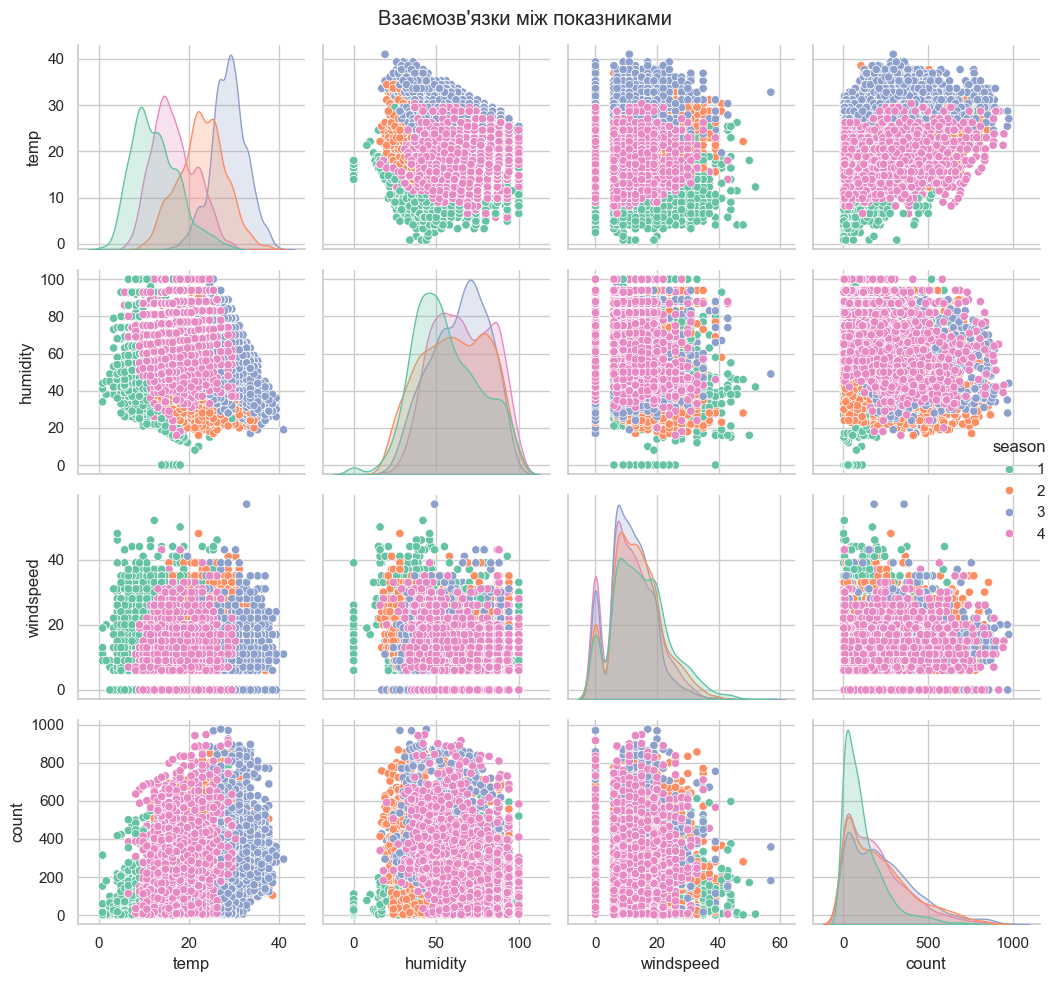

In [85]:
sample_df = df[['temp', 'humidity', 'windspeed', 'count', 'season']]
sns.pairplot(sample_df, hue='season', palette='Set2')
plt.suptitle('Взаємозв\'язки між показниками')
plt.tight_layout()
plt.show()


In [ ]:
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?

Найсильніший лінійний зв’язок спостерігається  між температурою і кількістю оренд. Чим більша температура тим більше оренд

2. Яка характеристика найбільше змінюється від сезону?

Температура найбільше змінюється залежно від сезону, її розподіли майже не перекриваються між сезонами.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

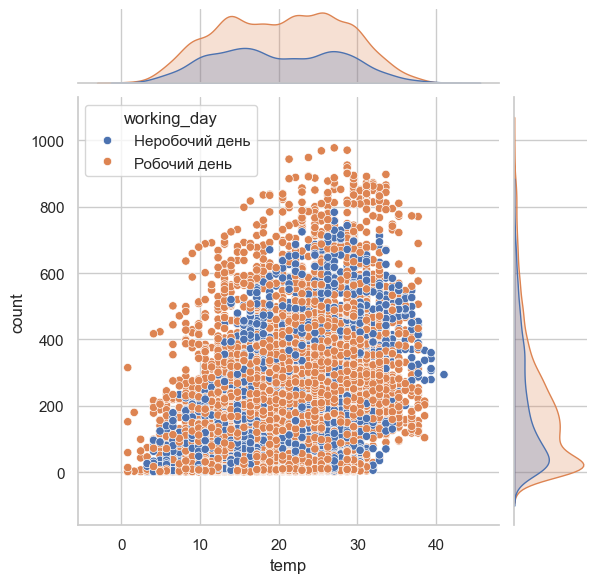

In [89]:
df['working_day'] = df['workingday'].map({
    0: 'Неробочий день',
    1: 'Робочий день'
})

sns.jointplot(data=df, x='temp', y='count', hue='working_day');

In [ ]:
1. Що показують графіки по краях?

Графіки по краю збоку показують розподіли температури за workingday категоріями, а по краю зверху розподіли 
кількості оренд за тими ж категоріями.

2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

Кількість оренд і в робочий і в неробочий день зростає зі зростанням температури, але кількість оренд в робочі дні в цілому вище.